In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

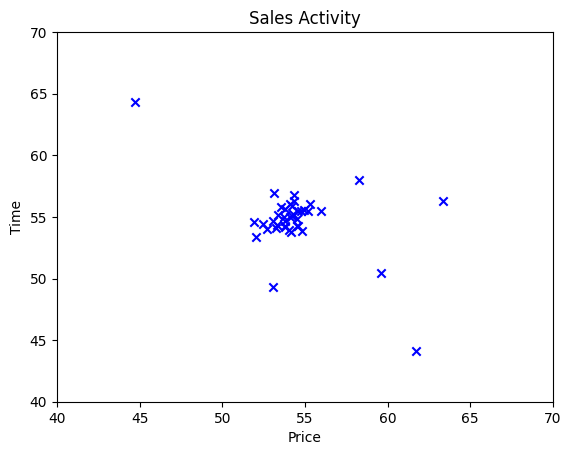

In [2]:
# Training data, used to fit a Gaussian distribution
X_train = np.array( [[53.81548, 54.17169],
 [54.31098, 56.25419],
 [53.53597, 55.77020],
 [54.80103, 53.81813],
 [53.77274, 54.64955],
 [53.76510, 55.02311],
 [54.05349, 53.93946],
 [55.30905, 56.04190],
 [53.15523, 56.92122],
 [52.69940, 53.99916],
 [54.36799, 56.75782],
 [53.26325, 54.09898],
 [51.91253, 54.61325],
 [53.37000, 55.18268],
 [54.15764, 53.77083],
 [55.99450, 55.45329],
 [54.96982, 55.59222],
 [54.75068, 55.46889],
 [53.33027, 54.34699],
 [53.05002, 54.68726],
 [53.77642, 54.23618],
 [55.17426, 55.50957],
 [54.21251, 55.08270],
 [53.82089, 55.61146],
 [54.12355, 54.95509],
 [54.54752, 54.85861],
 [54.09944, 56.03131],
 [54.57730, 54.25667],
 [54.52331, 54.23004],
 [54.30044, 55.26643],
 [54.55839, 55.48691],
 [54.22494, 55.86117],
 [52.04029, 53.34483],
 [53.07931, 49.34787],
 [61.72713, 44.12623],
 [52.47662, 54.45936],
 [59.58257, 50.41161],
 [63.33986, 56.29887],
 [58.26118, 57.97830],
 [44.75261, 64.35040]])

# Create a scatter plot of the data. To change the markers to blue "x",
# we used the 'marker' and 'c' parameters
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b') 

# Set the title
plt.title("Sales Activity")
# Set the y-axis label
plt.ylabel('Time')
# Set the x-axis label
plt.xlabel('Price')
# Set axis range
plt.axis([40, 70, 40, 70])
plt.show()

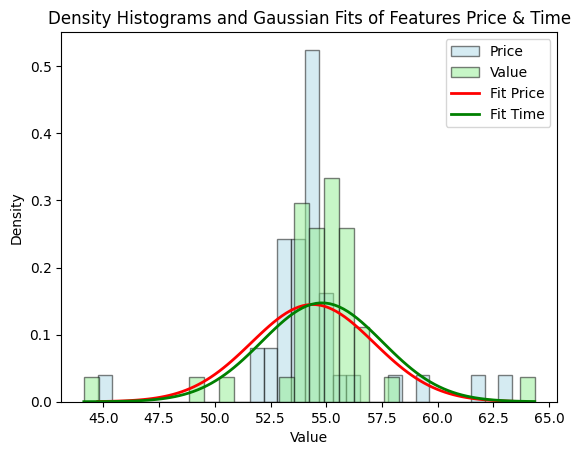

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Select the first and second features from your data
feature1 = X_train[:, 0]
feature2 = X_train[:, 1]

# Plotting the histograms with density=True
plt.hist(feature1, bins=30, density=True, color='lightblue', edgecolor='black', alpha=0.5, label='Price')
plt.hist(feature2, bins=30, density=True, color='lightgreen', edgecolor='black', alpha=0.5, label='Value')

# Fit Gaussian curves to the data
mean_feature1, std_feature1 = np.mean(feature1), np.std(feature1)
mean_feature2, std_feature2 = np.mean(feature2), np.std(feature2)

x_feature1 = np.linspace(min(feature1), max(feature1), 100)
x_feature2 = np.linspace(min(feature2), max(feature2), 100)

fit_feature1 = norm.pdf(x_feature1, mean_feature1, std_feature1)
fit_feature2 = norm.pdf(x_feature2, mean_feature2, std_feature2)

# Plot Gaussian curves
plt.plot(x_feature1, fit_feature1, 'r-', linewidth=2, label='Fit Price')
plt.plot(x_feature2, fit_feature2, 'g-', linewidth=2, label='Fit Time')

plt.title('Density Histograms and Gaussian Fits of Features Price & Time')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

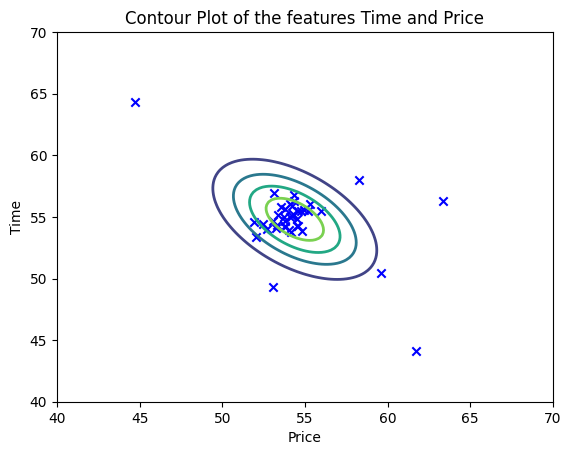

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Select the first and second features from your data
feature1 = X_train[:, 0]
feature2 = X_train[:, 1]

# Fit a 2D Gaussian to the data
mean = [np.mean(feature1), np.mean(feature2)]
covariance = np.cov(feature1, feature2)
gaussian = multivariate_normal(mean=mean, cov=covariance)

# Create a scatter plot of the data
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')

# Create a grid of values
x, y = np.meshgrid(np.linspace(min(feature1), max(feature1), 100), np.linspace(min(feature2), max(feature2), 100))
pos = np.dstack((x, y))

# Plot Gaussian contour lines
plt.contour(x, y, gaussian.pdf(pos), levels=5, linewidths=2, cmap='viridis')

# Set the title
plt.title("Contour Plot of the features Time and Price")
# Set the y-axis label
plt.ylabel('Time')
# Set the x-axis label
plt.xlabel('Price')
# Set axis range
plt.axis([40, 70, 40, 70])

plt.show()

In [5]:
def estimate_parameters(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    
    mu = 1 / m * np.sum(X, axis = 0)
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)
        
    return mu, var

In [6]:
# Estimate mean and variance of each feature
mu, var = estimate_parameters(X_train)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [54.38959275 54.80661075]
Variance of each feature: [7.5778417  7.33594621]


[2.03208380e-02 1.84975797e-02 1.90965393e-02 1.97490428e-02
 2.07819102e-02 2.07375027e-02 2.01290908e-02 1.81938816e-02
 1.42330415e-02 1.69105879e-02 1.64668530e-02 1.89733198e-02
 1.42032164e-02 1.97398355e-02 1.97706515e-02 1.75037734e-02
 2.00171922e-02 2.05399750e-02 1.95393413e-02 1.89442121e-02
 2.03663703e-02 1.98175010e-02 2.11916322e-02 1.99929462e-02
 2.12147794e-02 2.13071107e-02 1.91650287e-02 2.08620722e-02
 2.08433125e-02 2.10296965e-02 2.06444604e-02 1.97525842e-02
 1.28207252e-02 2.50087949e-03 2.57028912e-07 1.66297608e-02
 9.65609657e-04 9.28721377e-05 3.99969495e-03 9.37374199e-08]


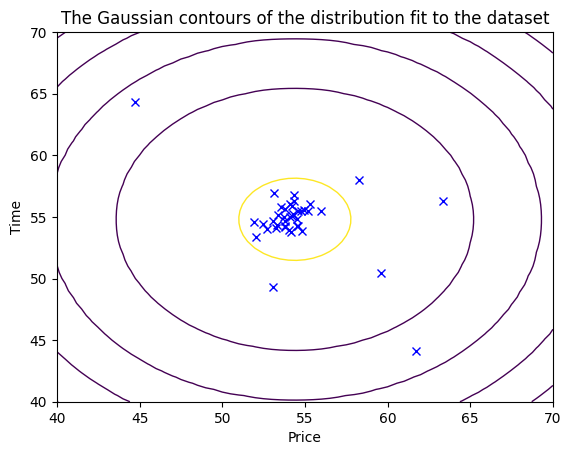

In [7]:
# Returns the density of the multivariate normal
# at each data point (row) of X_train
def gaussian_distribution(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

p = gaussian_distribution(X_train, mu, var)
print(p)

#Plotting code 
def visualize_data(X, mu, var):
    """
    This visualization shows you the 
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """
    
    X1, X2 = np.meshgrid(np.arange(40, 70.5, 0.5), np.arange(40, 70.5, 0.5))
    Z = gaussian_distribution(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
    Z = Z.reshape(X1.shape)

    plt.plot(X[:, 0], X[:, 1], 'bx')

    if np.sum(np.isinf(Z)) == 0:
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)
        
    # Set the title
    plt.title("The Gaussian contours of the distribution fit to the dataset")
    # Set the y-axis label
    plt.ylabel('Time')
    # Set the x-axis label
    plt.xlabel('Price')
    
visualize_data(X_train, mu, var)

In [8]:
# Cross-validation data
X_val = np.array([[53.65496, 53.97761], [55.59498, 55.04604], [53.77008, 55.37245], [56.22018, 54.39283], [53.55607, 53.83297], [54.71220, 55.16641], [54.27820, 55.55103], [53.22755, 53.69724], [53.17133, 53.04379], [55.22006, 55.70013], [53.08066, 54.47210], [53.68249, 54.24206], [52.77175, 54.87100], [54.86570, 55.49827], [55.14607, 56.29564], [53.03209, 54.37414], [56.30279, 54.08390], [53.71637, 56.42810], [53.77471, 53.43185], [55.06428, 55.40919], [52.31709, 54.07138], [54.22752, 55.52426], [54.68203, 54.84174], [54.21854, 54.60653], [54.38357, 55.40524], [54.74583, 56.98098], [53.76985, 53.51609], [54.02613, 54.18109], [52.71425, 54.42331], [54.22494, 56.28424], [54.29334, 55.99138], [54.95248, 54.36405], [54.73404, 55.81833], [59.28954, 50.67574], [48.73857, 56.79580], [40.30793, 45.39141], [68.54178, 61.59977], [59.03498, 52.02894], [54.37577, 63.35597], [48.77806, 56.68952]])

In [9]:
# Labels for cross-validation data
y_val = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
 1, 1, 1])

# In this case in y_val:
# - 0 indicates a normal day of sales
# - 1 indicates an anomalous day.

In [10]:
# Display the shape of X_val 
print ('The shape of X_val is:', X_val.shape)

# Display the shape of y_val 
print ('The shape of y_val is: ', y_val.shape)

The shape of X_val is: (40, 2)
The shape of y_val is:  (40,)


In [11]:
def set_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
        best_precision (float): Precision at best F1 score
        best_recall (float): Recall at best F1 score
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    best_precision = 0
    best_recall = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):

        predictions = (p_val < epsilon)

        tp = np.sum((predictions == 1) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        fn = np.sum((predictions == 0) & (y_val == 1))

        # Check if the denominator of precision (tp + fp) is zero 
        if tp + fp == 0:
            prec = 0
        else:
            prec = tp / (tp + fp)

        # Similarly, check if the denominator of recall (tp + fn) is zero 
        if tp + fn == 0:
            rec = 0
        else:
            rec = tp / (tp + fn)

        # Check if the denominator of F1 (prec + rec) is zero 
        if prec + rec == 0:
            F1 = 0
        else:
            F1 = 2 * prec * rec / (prec + rec)

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            best_precision = prec
            best_recall = rec
        
    return best_epsilon, best_F1, best_precision, best_recall

In [12]:
p_val = gaussian_distribution(X_val, mu, var)
epsilon, F1, precision, recall = set_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)
print('Best Precision on Cross Validation Set: %f' % precision)
print('Best Recall on Cross Validation Set: %f' % recall)

Best epsilon found using cross-validation: 3.038309e-03
Best F1 on Cross Validation Set: 1.000000
Best Precision on Cross Validation Set: 1.000000
Best Recall on Cross Validation Set: 1.000000


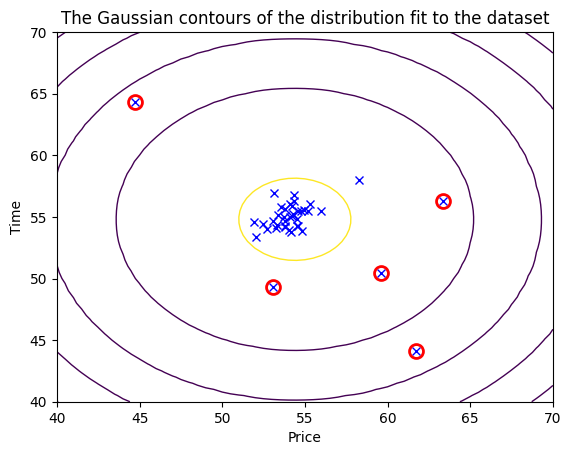

In [13]:
# Find the outliers in the training set 
outliers = p < epsilon

# Visualize the fit
visualize_data(X_train, mu, var)

# Draw a red circle around those outliers
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)